In [13]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:

# Cargar los datos
file_csv= 'datos/datos_pacientes.csv'
data = pd.read_csv(file_csv)




In [3]:
data.head(10)

,Edad,Peso,Presion_Arterial,Nivel_Colesterol,Diagnostico
0,54.395244,59.271367,136.110184,112.378250,1
1,57.698225,58.709665,119.589796,107.449293,0
2,75.587083,55.921919,119.500045,124.237700,1
3,60.705084,54.212301,97.258986,122.389077,1
4,61.292877,63.442607,131.855780,132.473402,1
5,77.150650,74.967688,116.838987,110.325476,1
6,64.609162,39.786843,110.148856,124.759037,1
7,47.349388,73.179707,98.819613,98.492998,0
8,53.131471,88.550126,115.503563,108.994334,0
9,55.543380,100.563610,107.264083,102.785948,0


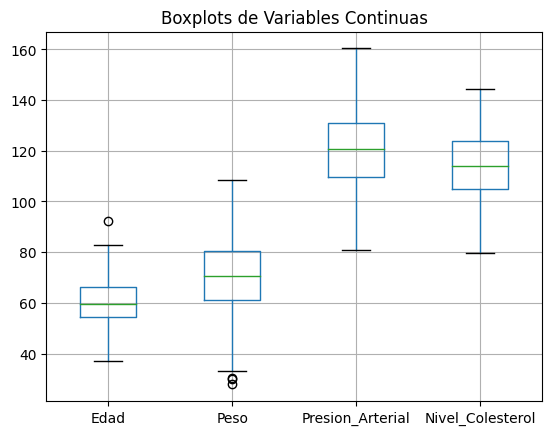

In [4]:

# Visualizar los boxplots de las variables continuas
continuous_variables = ['Edad', 'Peso', 'Presion_Arterial', 'Nivel_Colesterol']
data[continuous_variables].boxplot()
plt.title('Boxplots de Variables Continuas')
plt.show()


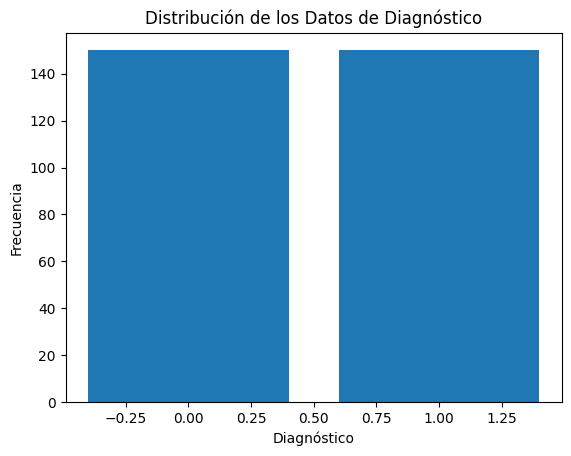

In [6]:
# Contar la frecuencia de cada valor en la columna 'Diagnostico'
diagnosis_counts = data['Diagnostico'].value_counts()

# Crear un gráfico de barras
plt.bar(diagnosis_counts.index, diagnosis_counts.values)

# Añadir etiquetas y título
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Datos de Diagnóstico')

# Mostrar el gráfico
plt.show()

In [10]:

# Estandarizar las variables
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[continuous_variables] = scaler.fit_transform(data[continuous_variables])

In [11]:
data[continuous_variables]

,Edad,Peso,Presion_Arterial,Nivel_Colesterol
0,54.395244,59.271367,136.110184,112.378250
1,57.698225,58.709665,119.589796,107.449293
2,75.587083,55.921919,119.500045,124.237700
3,60.705084,54.212301,97.258986,122.389077
4,61.292877,63.442607,131.855780,132.473402
...,...,...,...,...
295,60.667009,52.661252,109.484946,111.510573
296,78.668518,68.092771,123.615689,132.495006
297,46.490973,40.877224,114.713202,99.617444
298,60.209836,87.717713,125.567219,108.076851


In [12]:
data_scaled[continuous_variables]

,Edad,Peso,Presion_Arterial,Nivel_Colesterol
0,-0.630074,-0.733736,1.024889,-0.123827
1,-0.280257,-0.771668,-0.042602,-0.498183
2,1.614344,-0.959926,-0.048401,0.776903
3,0.038198,-1.075377,-1.485541,0.636500
4,0.100451,-0.452051,0.749984,1.402408
...,...,...,...,...
295,0.034166,-1.180120,-0.695542,-0.189727
296,1.940697,-0.138023,0.217538,1.404049
297,-1.467211,-1.975900,-0.357710,-1.093016
298,-0.014253,1.187257,0.343639,-0.450520


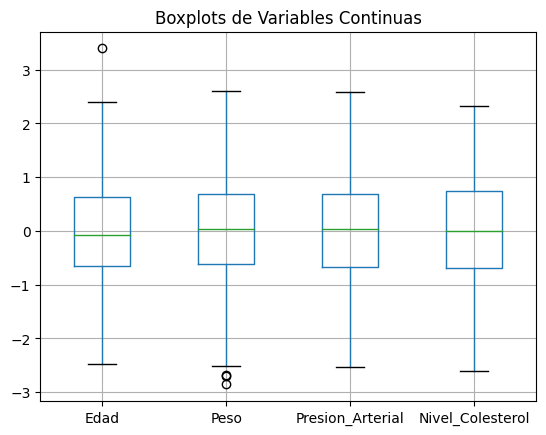

In [29]:
# Visualizar los boxplots de las variables continuas
data_scaled[continuous_variables].boxplot()
plt.title('Boxplots de Variables Continuas')
plt.show()

## Regresión Lineal Multiple

In [30]:

# Dividir los datos en entrenamiento y prueba
X_linear = data_scaled[['Edad', 'Peso', 'Presion_Arterial']]
y_linear = data_scaled['Nivel_Colesterol']
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=12)


In [31]:
# Crear y ajustar el modelo
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)
y_pred_linear = linear_model.predict(X_test_linear)

In [32]:

# Calcular R^2 y MSE
r2_linear = r2_score(y_test_linear, y_pred_linear)
mse_linear = mean_squared_error(y_test_linear, y_pred_linear)

# Imprimir resultados
print("Regresión Lineal - R^2:", r2_linear, "MSE:", mse_linear)

Regresión Lineal - R^2: 0.3278173914478336 MSE: 0.5654431744172526


## Regresión Logística

In [33]:
# Regresión Logística
# Dividir los datos en entrenamiento y prueba
X_logistic = data_scaled[['Edad', 'Peso', 'Presion_Arterial', 'Nivel_Colesterol']]
y_logistic = data['Diagnostico']
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Crear y ajustar el modelo
logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)
y_pred_logistic = logistic_model.predict(X_test_logistic)


In [34]:

# Calcular precisión, matriz de confusión y AUC
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
confusion_mat_logistic = confusion_matrix(y_test_logistic, y_pred_logistic)
auc_logistic = roc_auc_score(y_test_logistic, y_pred_logistic)


In [35]:

# Imprimir resultados
print("Regresión Logística - Precisión:", accuracy_logistic)
print("Regresión Logística - Matriz de Confusión:", confusion_mat_logistic)
print("Regresión Logística - AUC:", auc_logistic)

Regresión Logística - Precisión: 0.9833333333333333
Regresión Logística - Matriz de Confusión: [[34  1]
 [ 0 25]]
Regresión Logística - AUC: 0.9857142857142857


# Nueva sección